In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


Primero cargamos los datos en un DataFrame

In [21]:
path_folder="C:/Users/Luis/Desktop/Apuntes/4º Cuarto/Machine Learning/aprendizaje_supervisado_practica_1/pd_data_initial_preprocessing.csv"
pd_loan=pd.read_csv(path_folder)
pd_loan.head()

C:\Users\Luis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



,id,url,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
0,112435993,https://lendingclub.com/browse/loanDetail.acti...,148xx,NaN,NaN,NaN,NaN,55.0,1.0,2315.0,...,w,Individual,0.0,0.0,2300.0,0.0,381.0,4.0,9.0,1985.0
1,112290210,https://lendingclub.com/browse/loanDetail.acti...,021xx,NaN,69.0,NaN,26.0,94.0,0.0,1962.0,...,w,Individual,0.0,0.0,16000.0,7.0,300.0,9.0,6.0,1992.0
2,112436985,https://lendingclub.com/browse/loanDetail.acti...,018xx,NaN,NaN,NaN,10.0,45.0,1.0,1950.0,...,w,Individual,0.0,0.0,6025.0,2.0,180.0,11.0,6.0,2002.0
3,112439006,https://lendingclub.com/browse/loanDetail.acti...,913xx,NaN,95.0,NaN,6.0,60.0,1.0,4240.0,...,w,Individual,0.0,0.0,20400.0,0.0,125.0,15.0,1.0,2007.0
4,112438929,https://lendingclub.com/browse/loanDetail.acti...,560xx,NaN,72.0,26.0,127.0,78.0,0.0,2996.0,...,w,Individual,0.0,0.0,13000.0,1.0,184.0,5.0,2.0,2002.0


Veamos de qué tipos son las variables a estudiar

In [12]:
pd_loan.dtypes.to_dict()

{'id': dtype('O'),
 'url': dtype('O'),
 'zip_code': dtype('O'),
 'mths_since_last_record': dtype('float64'),
 'il_util': dtype('float64'),
 'mths_since_recent_bc_dlq': dtype('float64'),
 'mths_since_rcnt_il': dtype('float64'),
 'all_util': dtype('float64'),
 'inq_fi': dtype('float64'),
 'max_bal_bc': dtype('float64'),
 'total_cu_tl': dtype('float64'),
 'open_acc_6m': dtype('float64'),
 'open_act_il': dtype('float64'),
 'open_il_12m': dtype('float64'),
 'total_bal_il': dtype('float64'),
 'open_rv_12m': dtype('float64'),
 'open_rv_24m': dtype('float64'),
 'open_il_24m': dtype('float64'),
 'inq_last_12m': dtype('float64'),
 'mths_since_last_major_derog': dtype('float64'),
 'mths_since_recent_revol_delinq': dtype('float64'),
 'mths_since_last_delinq': dtype('float64'),
 'emp_title': dtype('O'),
 'emp_length': dtype('float64'),
 'mo_sin_old_il_acct': dtype('float64'),
 'revol_util': dtype('float64'),
 'dti': dtype('float64'),
 'verification_status': dtype('O'),
 'annual_inc': dtype('float64

Nuestra variable objetivo es 'loan_status' con lo cuál vamos a estudiarla, analizando cuántos clientes hay en cada categoría

In [13]:
pd_plot_loan_status_count=pd_loan['loan_status'].value_counts().reset_index() #Para el conteo absoluto
pd_plot_loan_status_percent=pd_loan['loan_status'].value_counts(normalize=True)\
                .mul(100).rename('percent').reset_index() #Para el porcentaje
#Juntamos ambas en una misma tabla
pd_plot_loan_status=pd.merge(pd_plot_loan_status_count,pd_plot_loan_status_percent)
pd_plot_loan_status

,index,loan_status,percent
0,Current,422685,47.767710
1,Fully Paid,345520,39.047279
2,Charged Off,97047,10.967299
3,Late (31-120 days),11168,1.262098
4,In Grace Period,5507,0.622347
5,Late (16-30 days),2915,0.329425
6,Default,34,0.003842


In [19]:
pd_plot_loan_status_count=pd_loan['loan_status'].value_counts().reset_index() #Para el conteo absoluto
pd_plot_loan_status_percent=pd_loan['loan_status'].value_counts(normalize=True)\
                .mul(100).rename('percent').reset_index() #Para el porcentaje
pd_plot_loan_status=pd.merge(pd_plot_loan_status_count,pd_plot_loan_status_percent)

fig = px.histogram(pd_plot_loan_status, x="index", y=['percent'])
fig.show()

Matriz de correlaciones:
Para ello deberemos hacer uso de las funciones auxiliares que nos ayudarán a calcular la lista de variables continuas y la propia matriz de correlaciones

In [15]:
import funciones_auxiliares
list_var_continuous = list(pd_loan.select_dtypes('float').columns)
#La metemos en la tabla
pd_loan[list_var_continuous]=list(pd_loan.select_dtypes(float).columns)

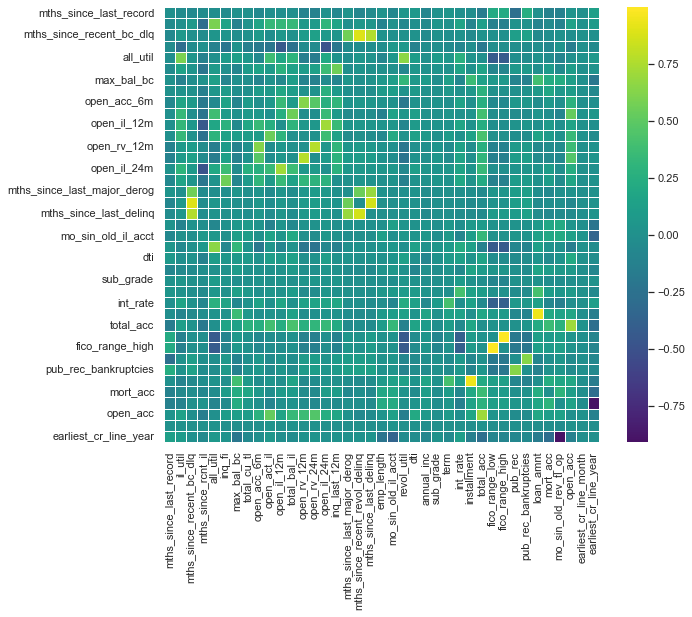

0

In [18]:
#¿No necesitamos imputar los valores missing
import funciones_auxiliares
funciones_auxiliares.get_corr_matrix(dataset = pd_loan[list_var_continuous], 
                metodo='pearson', size_figure=[10,8])

2.Valores missing

In [7]:
#Primero necesito crear un pd con solo dos categorías en loan_status: Fully Pais y Charged Off
pd_loan = pd_loan[(pd_loan['loan_status']=='Fully Paid') | 
                  (pd_loan['loan_status']=='Charged Off')]
pd_loan.shape

(442567, 51)

In [24]:
#Eliminamos las variables que no son 'Fully Paid' y 'Charged Off'
pd_loan = pd_loan[(pd_loan['loan_status']=='Fully Paid') | 
                  (pd_loan['loan_status']=='Charged Off')]
pd_plot_loan_status_count=pd_loan['loan_status'].value_counts().reset_index() #Para el conteo absoluto
pd_plot_loan_status_percent=pd_loan['loan_status'].value_counts(normalize=True)\
                .mul(100).rename('percent').reset_index() #Para el porcentaje
pd_plot_loan_status=pd.merge(pd_plot_loan_status_count,pd_plot_loan_status_percent)

fig = px.histogram(pd_plot_loan_status, x="index", y=['percent'])
fig.show()

In [25]:
#Llamemos a otra función para ver el número de valores missing por cada variable
funciones_auxiliares.get_deviation_of_mean_perc(pd_loan, list_var_continuous, target='loan_status', multiplier=3)

,Fully Paid,Charged Off,variable,sum_outlier_values,porcentaje_sum_null_values
0,0.866972,0.133028,il_util,218,0.000493
1,0.844156,0.155844,mths_since_recent_bc_dlq,77,0.000174
2,0.864092,0.135908,mths_since_rcnt_il,699,0.001579
3,0.888889,0.111111,all_util,27,0.000061
4,0.828169,0.171831,inq_fi,355,0.000802
5,0.875,0.125,max_bal_bc,440,0.000994
6,0.907826,0.092174,total_cu_tl,575,0.001299
7,0.806706,0.193294,open_acc_6m,507,0.001146
8,0.834658,0.165342,open_act_il,629,0.001421
9,0.804348,0.195652,open_il_12m,506,0.001143


Volvemos a llamar al modelo original para poder calcular las medias con el objetivo de sustituir los valores missing

In [27]:
pd_loan=pd.read_csv(path_folder)

In [30]:
mean=pd_loan['il_util'].mean()

Sustituyo por la media en primer lugar

In [32]:
pd_loan[list_var_continuous] = pd_loan[list_var_continuous].fillna(mean)

In [33]:
pd_loan[list_var_continuous]

,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,...,fico_range_low,fico_range_high,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
0,68.935964,68.935964,68.935964,68.935964,55.000000,1.000000,2315.000000,0.000000,0.000000,0.000000,...,700.000000,704.000000,0.000000,0.000000,2300.000000,0.000000,381.000000,4.000000,9.000000,1985.000000
1,68.935964,69.000000,68.935964,26.000000,94.000000,0.000000,1962.000000,6.000000,2.000000,1.000000,...,715.000000,719.000000,0.000000,0.000000,16000.000000,7.000000,300.000000,9.000000,6.000000,1992.000000
2,68.935964,68.935964,68.935964,10.000000,45.000000,1.000000,1950.000000,5.000000,1.000000,0.000000,...,700.000000,704.000000,0.000000,0.000000,6025.000000,2.000000,180.000000,11.000000,6.000000,2002.000000
3,68.935964,95.000000,68.935964,6.000000,60.000000,1.000000,4240.000000,1.000000,1.000000,10.000000,...,760.000000,764.000000,0.000000,0.000000,20400.000000,0.000000,125.000000,15.000000,1.000000,2007.000000
4,68.935964,72.000000,26.000000,127.000000,78.000000,0.000000,2996.000000,0.000000,0.000000,1.000000,...,660.000000,664.000000,0.000000,0.000000,13000.000000,1.000000,184.000000,5.000000,2.000000,2002.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884879,84.000000,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,...,680.000000,684.000000,1.000000,1.000000,13000.000000,0.000000,108.000000,9.000000,9.000000,2003.000000
884880,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,...,695.000000,699.000000,0.000000,0.000000,12000.000000,0.000000,83.000000,17.000000,10.000000,2003.000000
884881,110.000000,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,...,675.000000,679.000000,1.000000,0.000000,20000.000000,0.000000,155.000000,8.000000,12.000000,2001.000000
884882,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,...,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964,68.935964
